In [1]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


def solution_A2():
    TRAINING_DIR = 'dataset/train'
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        horizontal_flip=True,
        )

    train_generator= train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        target_size=(150, 150),
                                                      )
    
    VALIDATION_DIR = 'dataset/test'
    validation_datagen = ImageDataGenerator(
        rescale=1./255.
    )

    validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                    batch_size=32,
                                                                    class_mode='binary',
                                                                    target_size=(150, 150),
                                                                    )
    
    class callback_ibnu(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.80 and logs.get('val_accuracy')>0.80):
                print("\nReached 0.83 accuracy so cancelling training!")
                self.model.stop_training = True
                
    custom_callback = callback_ibnu()

    model=tf.keras.models.Sequential([
        # YOUR CODE HERE, end with a Neuron Dense, activated by sigmoid
        tf.keras.layers.Input(shape=(150, 150, 3)),
        # conv layer 1
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # conv layer 2
        tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # conv layer 3
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # conv layer 4
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # conv layer 5
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        # linear layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        
    model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
        
    model.fit(train_generator,
                epochs=1000,
                verbose=1,
                validation_data=validation_generator,
                callbacks=[custom_callback],
                )

    return model


# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_A2()
    model.save("model_A2.keras")

2024-10-20 16:30:15.100197: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 16:30:15.117872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 16:30:15.139030: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 16:30:15.145385: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 16:30:15.160780: I tensorflow/core/platform/cpu_feature_guar

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


2024-10-20 16:30:17.722671: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1086 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


Epoch 1/1000


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729441821.038657   72803 service.cc:146] XLA service 0x7f330000cc90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729441821.038695   72803 service.cc:154]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2024-10-20 16:30:21.117966: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 16:30:21.414585: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8904


 1/47 ━━━━━━━━━━━━━━━━━━━━ 4:01 5s/step - accuracy: 0.4688 - loss: 0.6954

I0000 00:00:1729441824.000140   72803 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - accuracy: 0.5923 - loss: 0.6551 - val_accuracy: 0.8080 - val_loss: 0.4555
Epoch 2/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.7822 - loss: 0.4945 - val_accuracy: 0.6860 - val_loss: 0.5493
Epoch 3/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.7617 - loss: 0.5193 - val_accuracy: 0.8580 - val_loss: 0.3463
Epoch 4/1000
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8269 - loss: 0.3787
Reached 0.83 accuracy so cancelling training!
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8270 - loss: 0.3787 - val_accuracy: 0.8640 - val_loss: 0.3064


In [6]:
import requests
from PIL import Image
from io import BytesIO
import os

def download_image(url, save_path):
    # Check if the URL points to a JPG image
    if not url.lower().endswith('.jpg'):
        raise ValueError("The URL does not point to a JPG image.")
    
    # Download the image
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        
        # Save the image to the specified path
        img.save(save_path, 'JPEG')
        print(f"Image successfully downloaded and saved to {save_path}")
    else:
        raise Exception(f"Failed to download image. Status code: {response.status_code}")


In [8]:
# Example usage
url = 'https://dynamic-media-cdn.tripadvisor.com/media/photo-o/1c/20/55/0d/americana-pizza.jpg'
save_path = 'pizza1.jpg'
download_image(url, save_path)

Image successfully downloaded and saved to pizza1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
The predicted class is: French Fries


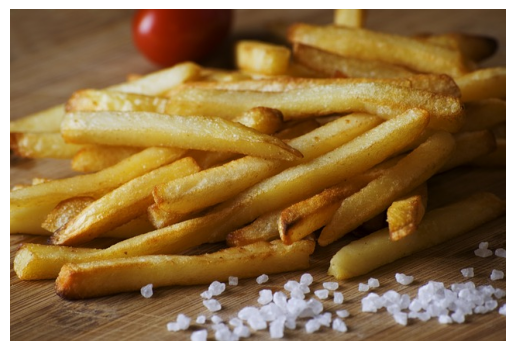

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('model_A2.keras')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array

# Function to make a prediction
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    return 'Pizza' if prediction[0][0] > 0.5 else 'French Fries'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predicted class is: Pizza


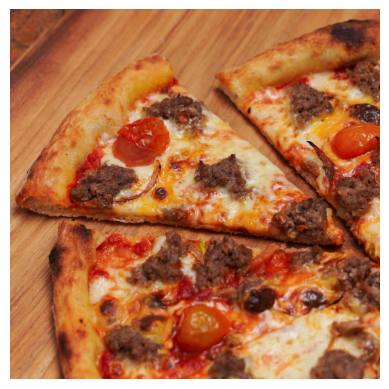

In [9]:
# Example usage
img_path = 'pizza1.jpg'
plt.imshow(image.load_img(img_path))
plt.axis('off')
result = predict_image(img_path)
print(f'The predicted class is: {result}')